In [1]:
%matplotlib inline
import matplotlib.pyplot as plt #plotting
import numpy as np #array functions
import scipy.fftpack # Fourier transform
from matplotlib import rcParams
import scipy.io
import wave #for loading audio files

#functionn to read int16 wav file
def readwav(fname):
    spf = wave.open(fname,'r')
    #Extract Raw Audio from Wav File
    signal = spf.readframes(-1)
    signal = np.fromstring(signal, 'Int16')
    time = np.linspace(0., float(signal.size)/spf.getframerate(), signal.size)
    return time, signal

/Users/cdohl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
/Users/cdohl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


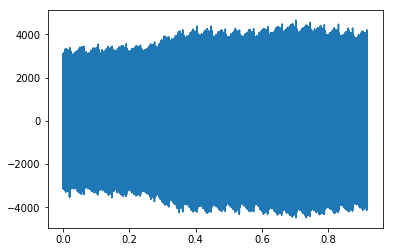

In [4]:
t,s=readwav('sine.wav')
plt.plot(t,s)

(2300, 2400)

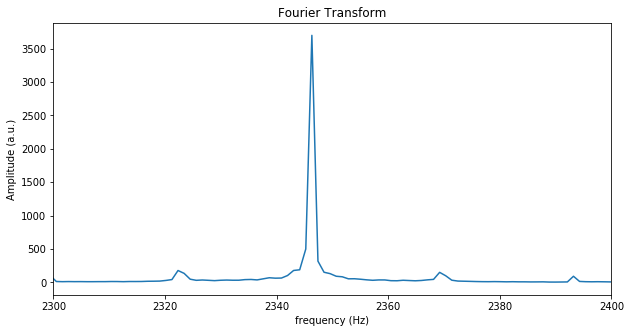

In [9]:
sf = np.fft.fft(s) # Fast Fourier Transform of the signal
F=int(1./(t[1]-t[0]))
N=len(s)
xf = np.linspace(0.0, F/2., int(N/2.)) # frequency array as x axis (0 to F/2 with N/2 points due to symmetry 

plt.figure(figsize=(10,5))
plt.plot(xf, 2.0/N * np.abs(sf[:N//2]));

plt.title("Fourier Transform")
plt.xlabel("frequency (Hz)")
plt.ylabel("Amplitude (a.u.)");
plt.xlim(2300,2400)

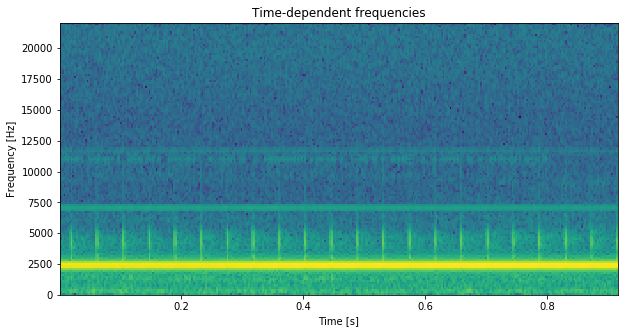

In [10]:
plt.figure(figsize=(10,5))
Pxx0, freqs0, bins0, im0 = plt.specgram(s, Fs = F)
plt.title("Time-dependent frequencies")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]');